<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import misc
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import display, HTML

# Read in the Data

In [3]:
df = pd.read_csv('https://github.com/sstangl/openpowerlifting-static/raw/gh-pages/openpowerlifting.csv.bz2')

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Print the Various Attributes

In [4]:
print(df.columns)

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg',
       'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg',
       'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Tested', 'AgeClass', 'Country', 'Glossbrenner',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')


# Raw Tested Data

In [5]:
raw_tested = df[(df['Tested']=='Yes') & (df['Equipment']=='Raw')]

In [6]:
display(raw_tested)

,Name,Sex,Event,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,McCulloch,Tested,AgeClass,Country,Glossbrenner,Federation,Date,MeetCountry,MeetState,MeetName
787,Becca Dison,F,SBD,Raw,19.0,Open,55.91,56,120.0,-125.0,...,419.64,Yes,18-19,USA,356.92,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
788,Andrea Fox,F,SBD,Raw,35.0,Open,67.22,67.5,102.5,-112.5,...,322.46,Yes,35-39,NaN,284.47,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
789,Candace Locklear,F,SBD,Raw,23.0,Open,74.66,75,137.5,145.0,...,378.96,Yes,20-23,NaN,333.41,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
791,Tara Peele,F,SBD,Raw,41.0,M1-Mst,73.66,75,102.5,110.0,...,310.78,Yes,40-44,USA,270.85,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
792,Kathryn French,F,D,Raw,26.0,Open,83.82,90,NaN,NaN,...,145.06,Yes,24-34,NaN,126.84,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
796,Chris Blanchard,M,SBD,Raw,40.0,M1-Mst,72.57,75,115.0,125.0,...,304.56,Yes,40-44,NaN,294.83,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
800,Matt Borquez,M,BD,Raw,29.0,Open,80.38,82.5,NaN,NaN,...,280.78,Yes,24-34,NaN,271.20,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
801,Rocky Hall,M,SBD,Raw,27.0,Open,79.11,82.5,185.0,200.0,...,424.58,Yes,24-34,USA,410.23,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
802,Adrian Sullivan,M,SBD,Raw,27.0,Open,76.11,82.5,185.0,195.0,...,410.89,Yes,24-34,USA,397.33,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
803,Avi Bagley,M,SBD,Raw,28.0,Open,79.29,82.5,160.0,172.5,...,363.88,Yes,24-34,NaN,351.58,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution


In [7]:
raw_tested_male = raw_tested[raw_tested['Sex']=='M']

Compare the bench press, squat, and deadlift of raw tested males.

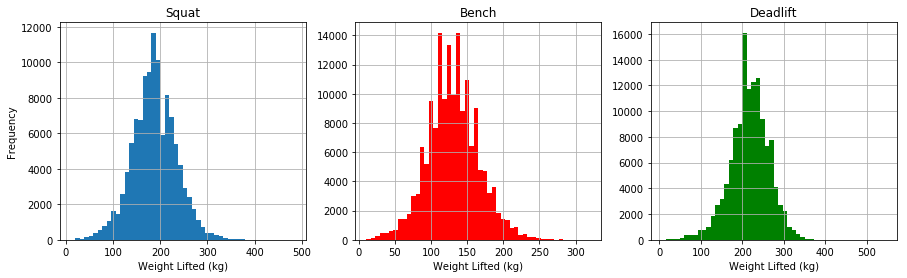

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

ax[0].hist(raw_tested_male['Best3SquatKg'][raw_tested_male['Best3SquatKg']>0], bins=50)
ax[1].hist(raw_tested_male['Best3BenchKg'][raw_tested_male['Best3BenchKg']>0], bins=50, color='r')
ax[2].hist(raw_tested_male['Best3DeadliftKg'][raw_tested_male['Best3DeadliftKg']>0], bins=50, color='g')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_title('Squat')
ax[1].set_title('Bench')
ax[2].set_title('Deadlift')

ax[0].set_xlabel('Weight Lifted (kg)')
ax[1].set_xlabel('Weight Lifted (kg)')
ax[2].set_xlabel('Weight Lifted (kg)')

ax[0].set_ylabel('Frequency')

plt.show()

# Total Lifts as a Function of Weight

Only take data when lifter completed all three lifts.

In [9]:
raw_tested_male_all3 = raw_tested_male[(raw_tested_male['Best3SquatKg']>0) &
                                       (raw_tested_male['Best3BenchKg']>0) &
                                       (raw_tested_male['Best3DeadliftKg']>0) &
                                      (raw_tested_male['BodyweightKg']>50) & 
                                       (raw_tested_male['BodyweightKg']<150)]

raw_tested_male_all3 = raw_tested_male_all3.dropna(subset=['BodyweightKg', 'TotalKg'])

Plot preliminary data.

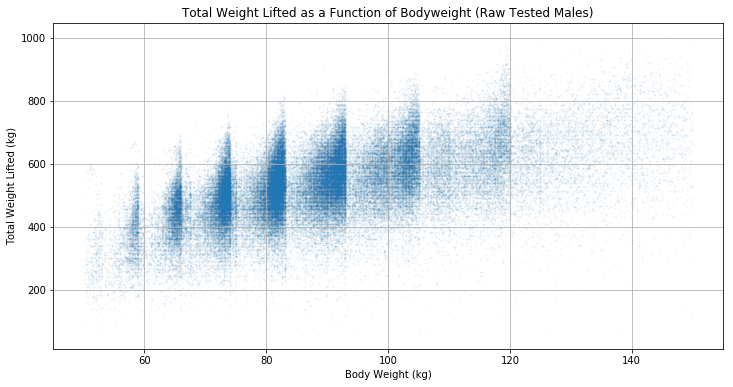

In [10]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(raw_tested_male_all3['BodyweightKg'], raw_tested_male_all3['TotalKg'], alpha=0.05, s=1)
ax.set_ylabel('Total Weight Lifted (kg)')
ax.set_xlabel('Body Weight (kg)')

ax.set_title('Total Weight Lifted as a Function of Bodyweight (Raw Tested Males)')
ax.grid()

plt.show()

## Do Some Curve Fitting

Obtain the body weight and lifted weight.

In [11]:
bw = np.array(raw_tested_male_all3['BodyweightKg'])
lw = np.array(raw_tested_male_all3['TotalKg'])

The logaritmic function we're fitting to:

In [12]:
def func(x, a, b):
    return a+b*x

popt, pcov = curve_fit(func, np.log(bw), lw)
a_log, b_log = popt[0], popt[1]

popt, pcov = curve_fit(func, bw, lw)
a_lin, b_lin = popt[0], popt[1]

In [13]:
x = np.linspace(50, 200, 1000)

Compare linear vs logarithmic best fit line.

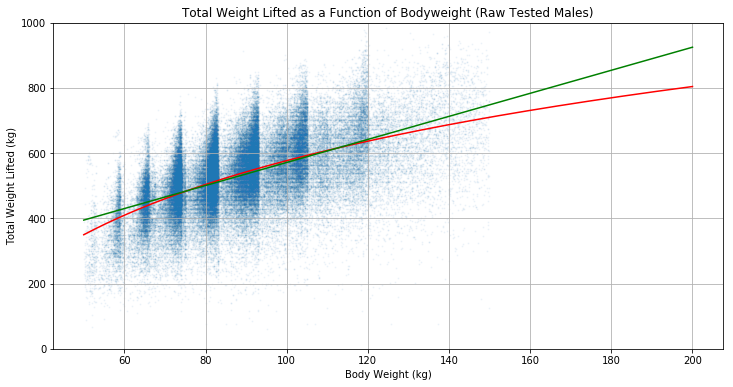

In [14]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(raw_tested_male_all3['BodyweightKg'], raw_tested_male_all3['TotalKg'], alpha=0.05, s=1)
ax.set_ylabel('Total Weight Lifted (kg)')
ax.set_xlabel('Body Weight (kg)')
ax.plot(x, a_log+b_log*np.log(x), color='r',label='Logarithmic Curve')
ax.plot(x, a_lin+b_lin*x, color='g', label='Linear Curve')

ax.set_title('Total Weight Lifted as a Function of Bodyweight (Raw Tested Males)')
ax.set_ylim(0, 1000)
ax.grid()

plt.show()

## Proposed Solution to Wilks 

In [15]:
a=-216.0475144
b=16.2606339
c=-0.002388645
d=-0.00113732
e=7.01863E-06
f=-1.291E-08

def wilks(lw, bw):
    return 500*lw/(a+b*bw+c*bw**2+d*bw**3+e*bw**4+f*bw**5)

def lifted_weight_wilks(wilks, bw):
    return (a+b*bw+c*bw**2+d*bw**3+e*bw**4+f*bw**5)*wilks/500

def points(lw, bw):
    avg_weight = a_log+b_log*np.log(bw)
    
    
def lifted_weight_points(points, bw):
    return 

In [16]:
lifted_weight(350, 59)

404.0756782372381

Treat the scoring system like IQ. 300 is the mean, 75 is standard deviation. First find the standard deviation (relaitve to our proposed log curve).

In [17]:
S = sum((lwi - (a_log+b_log*np.log(bwi)))**2 for (bwi, lwi) in zip(bw, lw))
std_dev = np.sqrt( S/(len(bw)+1))

Plots:

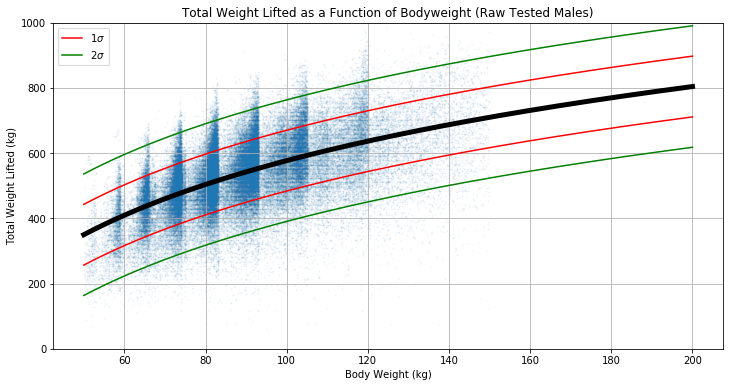

In [18]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(raw_tested_male_all3['BodyweightKg'], raw_tested_male_all3['TotalKg'], alpha=0.05, s=1, label='')
ax.set_ylabel('Total Weight Lifted (kg)')
ax.set_xlabel('Body Weight (kg)')
ax.plot(x, a_log+b_log*np.log(x), color='k', lw=5)
ax.plot(x, std_dev+a_log+b_log*np.log(x), color='r', label='$1\sigma$')
ax.plot(x, -std_dev+a_log+b_log*np.log(x), color='r')
ax.plot(x, 2*std_dev+a_log+b_log*np.log(x), color='g', label='$2\sigma$')
ax.plot(x, -2*std_dev+a_log+b_log*np.log(x), color='g')

ax.legend(loc='best')

ax.set_title('Total Weight Lifted as a Function of Bodyweight (Raw Tested Males)')
ax.set_ylim(0, 1000)
ax.grid()

plt.show()

## Obtain All Weight Classes

In [19]:
df1 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']<59)]
df2 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>59) & (raw_tested_male_all3['BodyweightKg']<66)]
df3 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>66) & (raw_tested_male_all3['BodyweightKg']<74)]
df4 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>74) & (raw_tested_male_all3['BodyweightKg']<83)]
df5 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>83) & (raw_tested_male_all3['BodyweightKg']<93)]
df6 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>93) & (raw_tested_male_all3['BodyweightKg']<105)]
df7 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>105) & (raw_tested_male_all3['BodyweightKg']<120)]
df8 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>120)]

dfs = [(df1, 59), (df2, 66), (df3, 74), (df4, 83), (df5, 93), (df6, 105), (df7, 120), (df8, 150)]

## See How Logarithmic Model Holds Up

In [77]:
def get_prop_over_n(lw_arr, freq_arr, bw, wilks):
    idx = (np.abs(lw_arr - lifted_weight(wilks, bw))).argmin()
    return np.trapz(freq_arr[idx:], lw_arr[idx:])

/Users/lukepolson/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


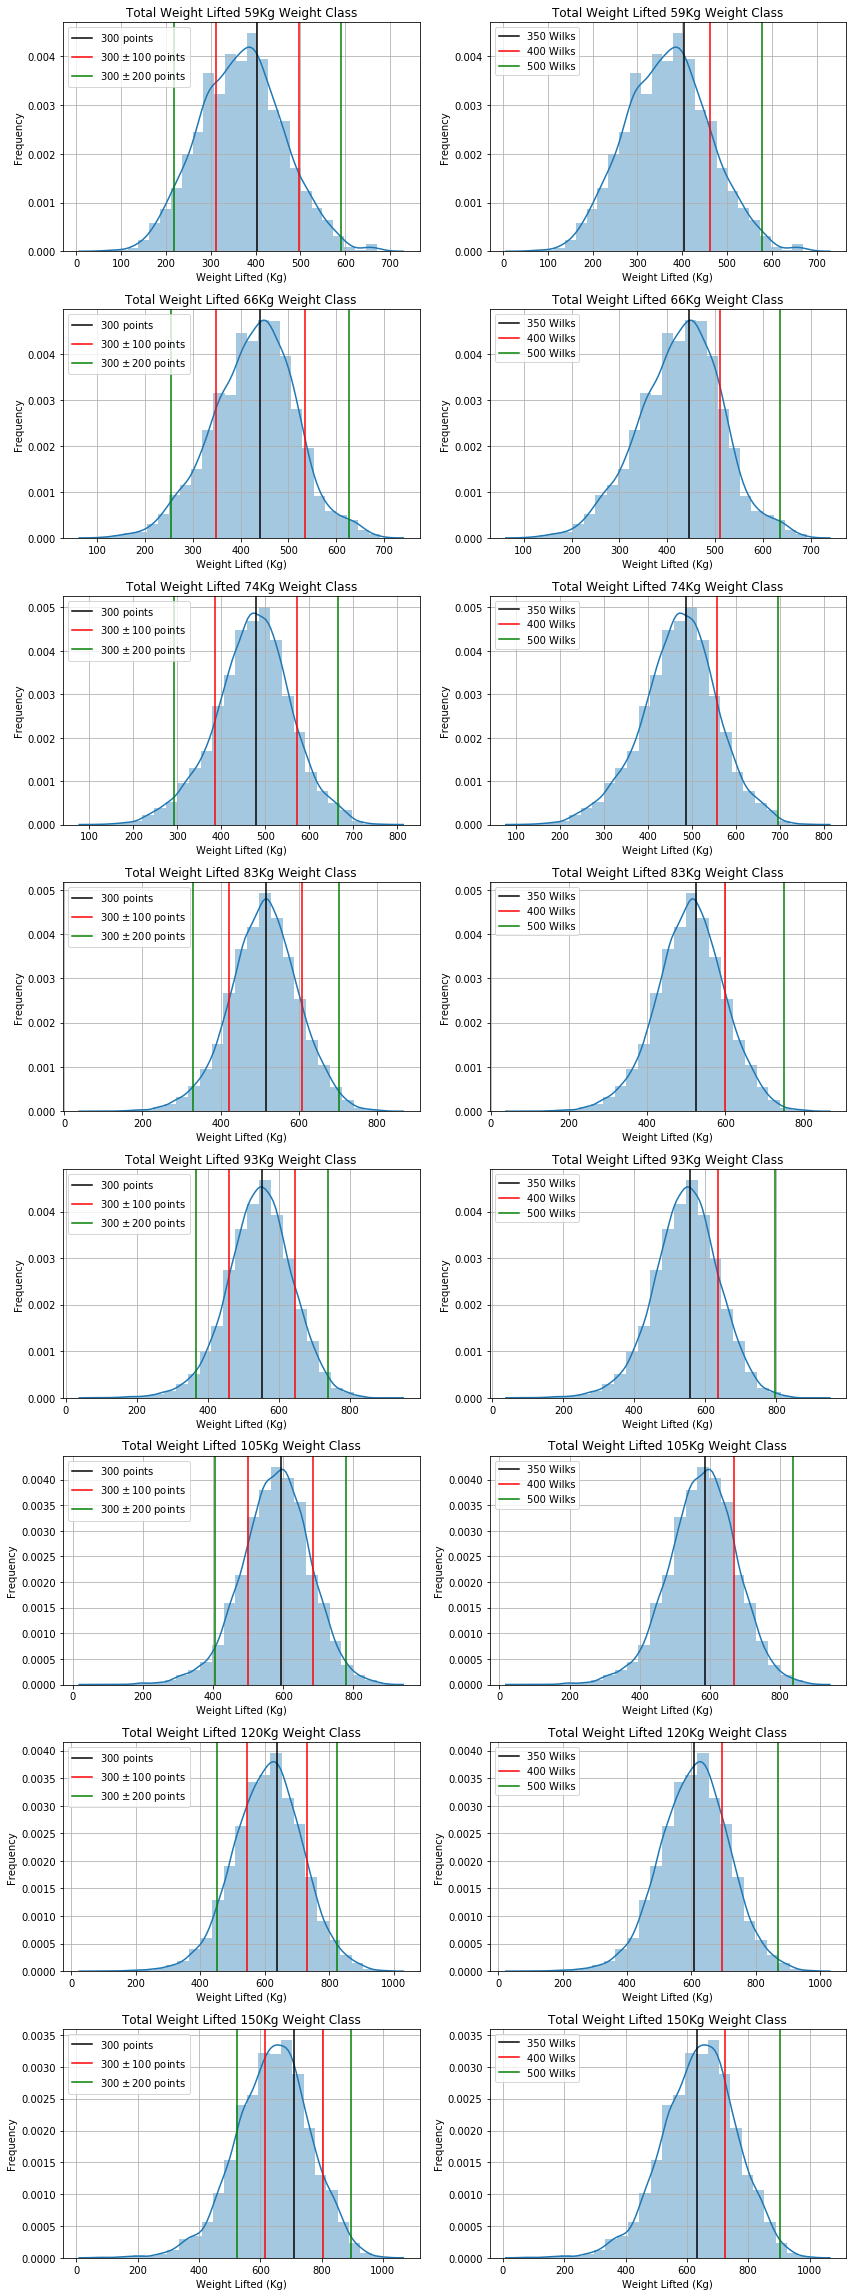

In [78]:
prop_over_500_wilks = []
prop_over_500_points = []

fig, ax = plt.subplots(8,2,figsize=(12,32))

for (i, df) in enumerate(dfs):
    
    (lw_arr, freq_arr) = sns.distplot(df[0]['TotalKg'], bins=25, ax=ax[i][0]).get_lines()[0].get_data()
    prop_over_500_wilks.append(get_prop_over_n(np.array(lw_arr), np.array(freq_arr), df[1], 500))
    sns.distplot(df[0]['TotalKg'], bins=25, ax=ax[i][1])
    
    ax[i][0].set_xlabel('Weight Lifted (Kg)')
    ax[i][0].set_ylabel('Frequency')
    ax[i][0].set_title('Total Weight Lifted {}Kg Weight Class'.format(df[1]))
    ax[i][1].set_xlabel('Weight Lifted (Kg)')
    ax[i][1].set_ylabel('Frequency')
    ax[i][1].set_title('Total Weight Lifted {}Kg Weight Class'.format(df[1]))

    ax[i][0].axvline(a_log+b_log*np.log(df[1]), color='k', label = '$300$ points')
    ax[i][0].axvline(std_dev+a_log+b_log*np.log(df[1]), color='r', label='$300 \pm 100$ points')
    ax[i][0].axvline(-std_dev+a_log+b_log*np.log(df[1]), color='r')
    ax[i][0].axvline(2*std_dev+a_log+b_log*np.log(df[1]), color='g', label='$300 \pm 200$ points')
    ax[i][0].axvline(-2*std_dev+a_log+b_log*np.log(df[1]), color='g')
    
    ax[i][1].axvline(lifted_weight(350, df[1]), color='k', label='350 Wilks')
    ax[i][1].axvline(lifted_weight(400, df[1]), color='r', label='400 Wilks')
    ax[i][1].axvline(lifted_weight(500, df[1]), color='g', label='500 Wilks')

    ax[i][0].grid()
    ax[i][0].legend(loc='best')
    ax[i][1].grid()
    ax[i][1].legend(loc='best')


fig.tight_layout()
plt.show()

Now we look at the percent of lifters in each weight class about above 500 points and 500
wilks respectively (the outliers). We want an equal proportion for all weight classes since 450 should signify "elite" lifters and there should be equal proportions in each weight catagory.

In [80]:
print(prop_over_500_wilks)

[0.015435353254822416, 0.009603902600393403, 0.003401239096351414, 0.003167154366804162, 0.0034602891750592376, 0.003937796002868839, 0.007981021476627182, 0.011081216733805153]
